In [1]:
import pandas as pd
import glob, os, json
import numpy as np
import plotly.express as ex

C:\Users\stg-sdu\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\stg-sdu\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\stg-sdu\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
path = 'C:/Users/stg-sdu/Notebooks/NLP/SemEval-2022/Data/'

In [3]:
train_data_location = path + "semeval-2022_task8_train-data_batch_v0.2.csv"
scraping_data_directory = path + 'scraping_data/'

In [4]:
def read_from_json(_id):
    files = glob.glob(scraping_data_directory+'**/'+_id+'.json')
    if len(files) == 1:
        with open(files[0].replace("\\","/")) as json_data:
            return json.load(json_data)
    elif len(files) == 0:
        #print("JSON file of the article %s not found" % (_id))
        return None
    elif len(files) == 0:
        #print("Many JSON files for the article %s" % (_id))
        return None
    
def rename_columns(df, list_columns, tag):
    dic = dict()
    for c in list_columns:
        dic[c] = c + tag
    return df.rename(dic, axis=1) 

## Extracting Data

In [9]:
train_data = pd.read_csv(train_data_location)
train_data[['pair1', 'pair2']] = train_data['pair_id'].str.split('_', expand=True, )
json_keys = list(read_from_json(train_data.loc[0]['pair1']).keys())
train_data['json1'] = train_data['pair1'].apply(read_from_json)
train_data = pd.concat([train_data.drop(['json1'], axis=1), train_data['json1'].apply(pd.Series)], axis=1)
train_data = rename_columns(train_data, json_keys, '_1')
train_data['json2'] = train_data['pair2'].apply(read_from_json)
train_data = pd.concat([train_data.drop(['json2'], axis=1), train_data['json2'].apply(pd.Series)], axis=1)
train_data = rename_columns(train_data, json_keys, '_2')

In [10]:
train_data

,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2,Geography,Entities,Time,...,tags_2,authors_2,publish_date_2,summary_2,article_html_2,meta_description_2,meta_lang_2,meta_favicon_2,meta_data_2,canonical_link_2
0,en,en,1484084337_1484110209,https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com/world/the_ameri...,https://web.archive.org/web/www.washingtonpost...,https://web.archive.org/web/www.washingtonpost...,4.0,4.000000,1.000000,...,[],"[Evens Sanon, January At Pm]",Wed Jan 1 00:00:00 2020,,,Haitian President Jovenel Moïse has broken wit...,en,,"{'object-hash': 1577903901, 'viewport': 'width...",https://www.washingtonpost.com/world/the_ameri...
1,en,en,1484396422_1483924666,https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com/news/world/europe/2020...,https://web.archive.org/web/www.stlucianewsonl...,https://web.archive.org/web/www.thestar.com/ne...,4.0,4.000000,1.000000,...,[],"[Kirsten Grieshaber, The Associated Press]",Wed Jan 1 00:00:00 2020,,,BERLIN - A fire at a zoo in western Germany in...,en,/favicon-thestar.ico,"{'viewport': 'width=device-width, initial-scal...",https://www.thestar.com/news/world/europe/2020...
2,en,en,1484698254_1483758694,https://www.teaparty.org/trump-brings-in-2020-...,https://www.timesofisrael.com/trump-says-he-do...,https://web.archive.org/web/www.teaparty.org/t...,https://web.archive.org/web/www.timesofisrael....,1.0,2.000000,1.000000,...,"[Full Coverage Times of Israel podcasts, Full ...",[],None,,,US president says response to rioting by pro-I...,en,https://static.timesofisrael.com/www/uploads/2...,"{'viewport': 'width=1024', 'description': 'US ...",https://www.timesofisrael.com/trump-says-he-do...
3,en,en,1576314516_1576455088,https://gadgets.ndtv.com/apps/news/zomato-uber...,https://gadgets.ndtv.com/internet/news/indian-...,https://web.archive.org/web/gadgets.ndtv.com/a...,https://web.archive.org/web/gadgets.ndtv.com/i...,1.0,2.333333,2.666667,...,"[Uber Eats, ber, Zomato, Swiggy]",[],None,,,The report by Google and Boston Consulting Gro...,en,https://gadgets.ndtv.com/favicon.ico,"{'viewport': 'width=1280', 'category': 'articl...",https://gadgets.ndtv.com/internet/news/indian-...
4,en,en,1484036253_1483894099,https://news.yahoo.com/india-approves-third-mo...,https://www.channelnewsasia.com/news/asia/indi...,https://web.archive.org/web/news.yahoo.com/ind...,https://web.archive.org/web/www.channelnewsasi...,1.0,1.250000,1.000000,...,"[India, space]",[],None,,,India plans to make a fresh attempt to land an...,en,/image/8395694/1x1/57/57/755b75f6028a7f36cbbf1...,"{'viewport': 'width=device-width, initial-scal...",https://www.channelnewsasia.com/news/asia/indi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,tr,tr,1586195445_1598778991,http://www.haberler.com/bm-aden-de-2-bini-aski...,https://www.haberler.com/bm-den-yemen-de-kadin...,https://web.archive.org/web/www.haberler.com/b...,https://web.archive.org/web/www.haberler.com/b...,1.0,2.000000,2.000000,...,[],[],None,,,BİRLEŞMİŞ Birleşmiş Milletler (BM) dünyanın en...,tr,/touch-icon-iphone.png,{'description': 'BİRLEŞMİŞ Birleşmiş Milletler...,https://www.haberler.com/bm-den-yemen-de-kadin...
4960,tr,tr,1590915424_1590940388,https://www.haberler.com/kovid-19-dan-dolayi-l...,https://www.aksam.com.tr/spor/fabio-capello-ko...,https://web.archive.org/web/www.haberler.com/k...,https://web.archive.org/web/www.aksam.com.tr/s...,1.0,1.000000,1.000000,...,[],[],None,,,Yeni tip koronavirüs (Kovid-19) salgınının eko...,tr,"/assets-spor/img/favicon.png?v=1907,3",{'title': '>Fabio Capello: Koronavirüs sonrası...,https://www.aksam.com.tr/spor/fabio-capello-ko...
4961,tr,tr,1526157103_1492737005,http://www.samanyoluhaber.com/saray-da-care-ol...,https://www.fotomac.com.tr/besiktas/2020/01/12...,https://web.archive.org/web/www.samanyoluhaber...,https://web.archive.org/web/www.fotomac.com.tr...,1.0,2.000000,3.000000,...,"[TFF, Türkiye Futbol Federasyonu, Beşi

In [11]:
train_data.to_csv(path + 'train_data_all.csv', index=False)

In [12]:
train_data.columns

Index(['url1_lang', 'url2_lang', 'pair_id', 'link1', 'link2', 'ia_link1',
       'ia_link2', 'Geography', 'Entities', 'Time', 'Narrative', 'Overall',
       'Style', 'Tone', 'pair1', 'pair2', 'source_url_1', 'url_1', 'title_1',
       'top_image_1', 'meta_img_1', 'images_1', 'movies_1', 'text_1',
       'keywords_1', 'meta_keywords_1', 'tags_1', 'authors_1',
       'publish_date_1', 'summary_1', 'article_html_1', 'meta_description_1',
       'meta_lang_1', 'meta_favicon_1', 'meta_data_1', 'canonical_link_1',
       'source_url_2', 'url_2', 'title_2', 'top_image_2', 'meta_img_2',
       'images_2', 'movies_2', 'text_2', 'keywords_2', 'meta_keywords_2',
       'tags_2', 'authors_2', 'publish_date_2', 'summary_2', 'article_html_2',
       'meta_description_2', 'meta_lang_2', 'meta_favicon_2', 'meta_data_2',
       'canonical_link_2'],
      dtype='object')

In [13]:
pd.set_option('max_columns', None)
train_data.head(3)

,url1_lang,url2_lang,pair_id,link1,link2,ia_link1,ia_link2,Geography,Entities,Time,Narrative,Overall,Style,Tone,pair1,pair2,source_url_1,url_1,title_1,top_image_1,meta_img_1,images_1,movies_1,text_1,keywords_1,meta_keywords_1,tags_1,authors_1,publish_date_1,summary_1,article_html_1,meta_description_1,meta_lang_1,meta_favicon_1,meta_data_1,canonical_link_1,source_url_2,url_2,title_2,top_image_2,meta_img_2,images_2,movies_2,text_2,keywords_2,meta_keywords_2,tags_2,authors_2,publish_date_2,summary_2,article_html_2,meta_description_2,meta_lang_2,meta_favicon_2,meta_data_2,canonical_link_2
0,en,en,1484084337_1484110209,https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com/world/the_ameri...,https://web.archive.org/web/www.washingtonpost...,https://web.archive.org/web/www.washingtonpost...,4.0,4.0,1.0,4.000000,4.000000,1.666667,2.000000,1484084337,1484110209,https://www.washingtonpost.com,https://www.washingtonpost.com/local/virginia-...,Virginia man arrested in fatal DUI crash in We...,https://www.washingtonpost.com/resizer/2CjPNwq...,https://www.washingtonpost.com/resizer/2CjPNwq...,[https://www.washingtonpost.com/resizer/yAFxTh...,[],"MARTINSBURG, W.Va. — A suspected drunken drive...",[],"[Highway Fatal-DUI-West Virginia, Martinsburg,...",[],"[Associated Press, January At Pm]",Wed Jan 1 00:00:00 2020,,,Police in West Virginia say a suspected drunke...,en,,"{'object-hash': 1577900726, 'viewport': 'width...",https://www.washingtonpost.com/local/virginia-...,https://www.washingtonpost.com,https://www.washingtonpost.com/world/the_ameri...,Haiti’s leader marks independence day amid sec...,https://www.washingtonpost.com/resizer/2CjPNwq...,https://www.washingtonpost.com/resizer/2CjPNwq...,[https://www.washingtonpost.com/resizer/2CjPNw...,[],"PORT-AU-PRINCE, Haiti — Haitian President Jove...",[],"[CB-Haiti-Political Turmoil, Jean, Haiti, Cari...",[],"[Evens Sanon, January At Pm]",Wed Jan 1 00:00:00 2020,,,Haitian President Jovenel Moïse has broken wit...,en,,"{'object-hash': 1577903901, 'viewport': 'width...",https://www.washingtonpost.com/world/the_ameri...
1,en,en,1484396422_1483924666,https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com/news/world/europe/2020...,https://web.archive.org/web/www.stlucianewsonl...,https://web.archive.org/web/www.thestar.com/ne...,4.0,4.0,1.0,4.000000,3.666667,1.666667,1.333333,1484396422,1483924666,https://www.stlucianewsonline.com,https://www.stlucianewsonline.com/guyana-three...,Guyana: Three injured after car crashes into u...,https://www.stlucianewsonline.com/wp-content/u...,https://www.stlucianewsonline.com/wp-content/u...,[https://www.stlucianewsonline.com/wp-content/...,[],Share This On:\n\nPin 11 Shares\n\n(NEWS ROOM ...,[],[],[],[],Wed Jan 1 21:17:15 2020,,,-,en,https://www.stlucianewsonline.com/wp-content/u...,"{'viewport': 'width=device-width, initial-scal...",https://www.stlucianewsonline.com/guyana-three...,https://www.thestar.com,https://www.thestar.com/news/world/europe/2020...,Fire kills more than 30 animals at zoo in west...,https://images.thestar.com/819gxyQoC3d12hAB61L...,https://images.thestar.com/819gxyQoC3d12hAB61L...,[https://images.thestar.com/v6B6OwTyb_6-cpQLfz...,[],BERLIN - A fire at a zoo in western Germany in...,[],"[smg2_world, smg_europe, smg2_news]",[],"[Kirsten Grieshaber, The Associated Press]",Wed Jan 1 00:00:00 2020,,,BERLIN - A fire at a zoo in western Germany in...,en,/favicon-thestar.ico,"{'viewport': 'width=device-width, initial-scal...",https://www.thestar.com/news/world/europe/2020...
2,en,en,1484698254_1483758694,https://www.teaparty.org/trump-brings-in-2020-...,https://www.timesofisrael.com/trump-says-he-do...,https://web.archive.org/web/www.teaparty.org/t...,https://web.archive.org/web/www.timesofisrael....,1.0,2.0,1.0,2.333333,2.333333,1.000000,1.333333,1484698254,1483758694,https://www.teaparty.org,https://www.teaparty.org/trump-brings-in-2020-...,Trump Brings In 2020 At Mar-a-Lago: ‘We’re Goi...,https://www.te

In [14]:
len(train_data[train_data['url1_lang'] != train_data['url2_lang']])

577

In [15]:
len(train_data)

4964

In [16]:
# train_data[train_data['url1_lang'] != train_data['url2_lang']]

## Transformation

In [17]:
df = train_data.copy(deep=True)

In [18]:
df['pair_lang'] = df['url1_lang'] + '_' + df['url2_lang']

In [19]:
cols_1 = ['summary_1', 'summary_2']
cols_2 = ['keywords_1', 'keywords_2', 'tags_1', 'tags_2', 'authors_1', 'authors_2']

In [20]:
none_ = []
empty_ = []
name_ = []

for col in cols_1:
    name_.append(col)
    none_.append(len(df[df[col].isna()]))
    empty_.append(len(df[df[col] == '']))
for col in cols_2:
    name_.append(col)
    none_.append(len(df[df[col].isna()]))
    df[col] = df[col].astype('str')
    empty_.append(len(df[df[col] == '[]']))

In [21]:
df2 = pd.DataFrame({'name': name_, 'none': none_, 'empty': empty_})
df2['sum'] = (df2['empty'] + df2.none)
df2

,name,none,empty,sum
0,summary_1,140,4824,4964
1,summary_2,125,4839,4964
2,keywords_1,140,4824,4964
3,keywords_2,125,4839,4964
4,tags_1,140,3507,3647
5,tags_2,125,3347,3472
6,authors_1,140,2465,2605
7,authors_2,125,2677,2802


In [22]:
df.drop(columns=['url1_lang', 'url2_lang', 'link1', 'link2', 'ia_link1', 'ia_link2', 'pair1', 'pair2', 'url_1', 'top_image_1',
                 'meta_img_1', 'images_1', 'movies_1', 'summary_1', 'article_html_1', 'meta_lang_1', 'meta_favicon_1',
                 'canonical_link_1', 'url_2', 'top_image_2', 'meta_img_2', 'images_2', 'movies_2', 'summary_2',
                 'article_html_2', 'meta_lang_2', 'meta_favicon_2', 'canonical_link_2', 'keywords_1', 'keywords_2',
                 'tags_1', 'tags_2', 'authors_1', 'authors_2', 'meta_data_1', 'meta_data_2'], inplace=True)

In [23]:
cols = ['pair_id', 'pair_lang', 'source_url_1', 'publish_date_1', 'source_url_2', 'publish_date_2',
        'title_1', 'text_1', 'meta_description_1', 'meta_keywords_1',
        'title_2', 'text_2', 'meta_description_2', 'meta_keywords_2',
        'Geography', 'Entities', 'Time', 'Narrative', 'Overall', 'Style', 'Tone']

In [24]:
df = df[cols]

In [25]:
df

,pair_id,pair_lang,source_url_1,publish_date_1,source_url_2,publish_date_2,title_1,text_1,meta_description_1,meta_keywords_1,title_2,text_2,meta_description_2,meta_keywords_2,Geography,Entities,Time,Narrative,Overall,Style,Tone
0,1484084337_1484110209,en_en,https://www.washingtonpost.com,Wed Jan 1 00:00:00 2020,https://www.washingtonpost.com,Wed Jan 1 00:00:00 2020,Virginia man arrested in fatal DUI crash in We...,"MARTINSBURG, W.Va. — A suspected drunken drive...",Police in West Virginia say a suspected drunke...,"[Highway Fatal-DUI-West Virginia, Martinsburg,...",Haiti’s leader marks independence day amid sec...,"PORT-AU-PRINCE, Haiti — Haitian President Jove...",Haitian President Jovenel Moïse has broken wit...,"[CB-Haiti-Political Turmoil, Jean, Haiti, Cari...",4.0,4.000000,1.000000,4.000000,4.000000,1.666667,2.000000
1,1484396422_1483924666,en_en,https://www.stlucianewsonline.com,Wed Jan 1 21:17:15 2020,https://www.thestar.com,Wed Jan 1 00:00:00 2020,Guyana: Three injured after car crashes into u...,Share This On:\n\nPin 11 Shares\n\n(NEWS ROOM ...,-,[],Fire kills more than 30 animals at zoo in west...,BERLIN - A fire at a zoo in western Germany in...,BERLIN - A fire at a zoo in western Germany in...,"[smg2_world, smg_europe, smg2_news]",4.0,4.000000,1.000000,4.000000,3.666667,1.666667,1.333333
2,1484698254_1483758694,en_en,https://www.teaparty.org,None,https://www.timesofisrael.com,None,Trump Brings In 2020 At Mar-a-Lago: ‘We’re Goi...,(Breitbart) – President Donald Trump welcomed ...,,[],"Trump says he does not expect war with Iran, ‘...","PALM BEACH, United States — US President Donal...",US president says response to rioting by pro-I...,[],1.0,2.000000,1.000000,2.333333,2.333333,1.000000,1.333333
3,1576314516_1576455088,en_en,https://gadgets.ndtv.com,None,https://gadgets.ndtv.com,None,Zomato Buys Uber's Food Delivery Business in I...,Uber has sold its online food-ordering busines...,Zomato on Tuesday announced it has acquired Ub...,[zomato uber eats business acquisition india a...,Indian Online Food Delivery Market to Hit $8 B...,Rapid digitisation and growth in both online b...,The report by Google and Boston Consulting Gro...,[indian online food delivery market to hit usd...,1.0,2.333333,2.666667,1.666667,2.000000,1.666667,1.666667
4,1484036253_1483894099,en_en,https://news.yahoo.com,Wed Jan 1 08:57:59 2020,https://www.channelnewsasia.com,None,"India approves third moon mission, months afte...",BENGALURU (Reuters) - India has approved its t...,India has approved its third lunar mission mon...,[],India targets new moon mission in 2020,BANGALORE: India plans to make a fresh attempt...,India plans to make a fresh attempt to land an...,"[India, space]",1.0,1.250000,1.000000,1.250000,1.250000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,1586195445_1598778991,tr_tr,http://www.haberler.com,None,https://www.haberler.com,None,"BM, Aden'de 2 bini aşkın iç göçmenin selden za...","BM, Aden'de 2 bini aşkın iç göçmenin selden za...","Birleşmiş Milletler (BM), 2 bini aşkın iç göçm...","[Birleşmiş Milletler, Twitter, Yemen, Güncel]",BM'den Yemen'de kadınların doğumda ölüm riski ...,BM'den Yemen'de kadınların doğumda ölüm riski ...,BİRLEŞMİŞ Birleşmiş Milletler (BM) dünyanın en...,"[Birleşmiş Milletler, Yemen, Güncel, Haber]",1.0,2.000000,2.000000,4.000000,3.000000,1.000000,1.000000
4960,1590915424_1590940388,tr_tr,https://www.haberler.com,None,https://www.aksam.com.tr,None,Kovid-19'dan dolayı La Liga kulüplerinde hayat...,Kovid-19'dan dolayı La Liga kulüplerinde hayat...,Yeni tip koronavirüs (Kovid-19) salgınının eko...,"[Real Madrid, İspanya, La Liga, Futbol, Spor]",Fabio Capello: Koronavirüs sonrası La Liga'da ...,Yeni tip koronavirüs (Kovid-19) salgınının eko...,Yeni tip koronavirüs (Kovid-19) salgınının eko...,"[İspanya 1. Futbol Ligi, la liga, koronavirüs,...",1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4961,1526157103_1492737005,tr_tr,http://www.s

In [26]:
df.to_csv(path + 'train_data_prep_v1.csv', index=False)

In [5]:
df = pd.read_csv('train_data_prep_v1.csv')

In [7]:
df.pair_lang.value_counts()

en_en    1800
de_de     857
de_en     577
es_es     570
tr_tr     465
pl_pl     349
ar_ar     274
fr_fr      72
Name: pair_lang, dtype: int64

In [9]:
df[df.pair_lang == 'en_en'].Overall.value_counts()

4.000000    624
1.000000    214
3.666667    175
3.000000    148
2.000000    123
3.333333    112
1.333333     84
2.333333     84
1.666667     70
2.666667     69
3.500000     26
1.500000     16
2.500000     14
3.750000      8
2.750000      4
1.750000      4
3.800000      4
3.400000      3
3.250000      3
2.250000      3
3.571429      1
3.875000      1
1.250000      1
3.857143      1
2.625000      1
1.200000      1
1.142857      1
3.600000      1
3.833333      1
1.400000      1
2.200000      1
2.800000      1
Name: Overall, dtype: int64

In [10]:
df[df.pair_lang == 'fr_fr'].Overall.value_counts()

4.0    20
2.0    19
3.0    19
1.0    14
Name: Overall, dtype: int64

In [27]:
df[['Geography', 'Entities', 'Time', 'Narrative', 'Overall',
    'Style', 'Tone']].describe(percentiles=[0.05, .10, .25, .50, .75, .9, .95])

,Geography,Entities,Time,Narrative,Overall,Style,Tone
count,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000,4964.000000
mean,1.930625,2.704471,1.956806,2.854857,2.803369,1.746016,1.722173
std,1.148147,1.157783,1.148235,1.110514,1.133874,0.913308,0.869120
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,3.000000,1.333333,3.000000,3.000000,1.333333,1.333333
75%,3.000000,4.000000,3.000000,4.000000,4.000000,2.000000,2.000000
90%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000


<AxesSubplot:ylabel='Density'>

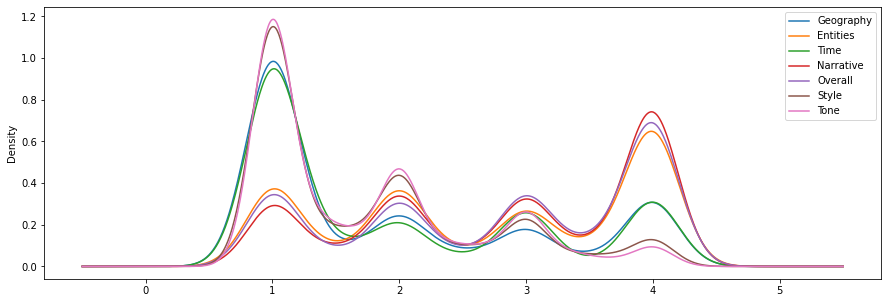

In [28]:
df[['Geography', 'Entities', 'Time', 'Narrative', 'Overall',
    'Style', 'Tone']].plot.kde(figsize=(15, 5))

In [29]:
# df[['Geography', 'Entities', 'Time', 'Narrative', 'Overall',
#     'Style', 'Tone']].plot.hist(bins=20, figsize=(15, 5))

In [30]:
df.corr(method='spearman').style.applymap(lambda x: 'background-color : yellow' if x >= 0.6 and x < 1 else '')

,Geography,Entities,Time,Narrative,Overall,Style,Tone
Geography,1.000000,0.646112,0.157718,0.526442,0.604083,0.306299,0.368022
Entities,0.646112,1.000000,0.281283,0.742463,0.805473,0.309796,0.398840
Time,0.157718,0.281283,1.000000,0.423431,0.447470,0.085194,0.177128
Narrative,0.526442,0.742463,0.423431,1.000000,0.874589,0.291193,0.445494
Overall,0.604083,0.805473,0.447470,0.874589,1.000000,0.304357,0.445353
Style,0.306299,0.309796,0.085194,0.291193,0.304357,1.000000,0.544282
Tone,0.368022,0.398840,0.177128,0.445494,0.445353,0.544282,1.000000


In [31]:
df.corr(method='pearson').style.applymap(lambda x: 'background-color : yellow' if x >= 0.6 and x < 1 else '')

,Geography,Entities,Time,Narrative,Overall,Style,Tone
Geography,1.000000,0.628336,0.124562,0.518759,0.591452,0.325434,0.354300
Entities,0.628336,1.000000,0.247395,0.739653,0.808145,0.322648,0.385781
Time,0.124562,0.247395,1.000000,0.401113,0.426289,0.099781,0.175411
Narrative,0.518759,0.739653,0.401113,1.000000,0.884153,0.322813,0.447692
Overall,0.591452,0.808145,0.426289,0.884153,1.000000,0.325558,0.445192
Style,0.325434,0.322648,0.099781,0.322813,0.325558,1.000000,0.572780
Tone,0.354300,0.385781,0.175411,0.447692,0.445192,0.572780,1.000000
